<a href="https://colab.research.google.com/github/SHEV-4/telecom-churn-prediction/blob/data_analysis/project_9_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Task 1.1 — Завантаження даних

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Завантаження даних

url = "https://raw.githubusercontent.com/SHEV-4/telecom-churn-prediction/tree/data_analysis/internet_service_churn.csv"

df = pd.read_csv(url)
df.head()


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


✔️ Task 1.1 — Завантаження даних

Дані були завантажені у середовище розробки за допомогою функції:

df = pd.read_csv("internet_service_churn.csv")

Після цього були виведені перші 5 рядків за допомогою df.head(), що дозволило оцінити структуру датасету.

In [ ]:
# Task 1.2 — Огляд структури

print("Перші 5 рядків:")
print(df.head())

print("\nІнформація про датафрейм:")
print(df.info())

print("\nОписова статистика:")
print(df.describe())


Перші 5 рядків:
   id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15                 1                            0             11.95   
1  18                 0                            0              8.22   
2  23                 1                            0              8.91   
3  27                 0                            0              6.87   
4  34                 0                            0              6.39   

   bill_avg  reamining_contract  service_failure_count  download_avg  \
0        25                0.14                      0           8.4   
1         0                 NaN                      0           0.0   
2        16                0.00                      0          13.7   
3        21                 NaN                      1           0.0   
4         0                 NaN                      0           0.0   

   upload_avg  download_over_limit  churn  
0         2.3                    0      0  
1         0.0     

✔️ Task 1.2 — Огляд структури

Дані містять інформацію про користувачів телекомунікаційного сервісу
Кількість ознак: 10
Кількість записів: 72274

Цей крок дозволив зрозуміти, які ознаки числові/категоріальні, чи є потенційні помилки в типах даних, чи помітні аномальні діапазони.

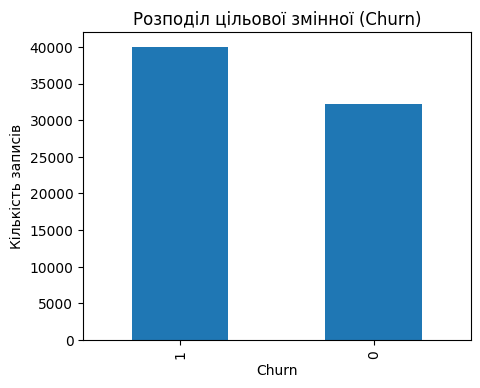

In [ ]:
# Task 1.3 — Аналіз розподілу цільової змінної ('churn')

# Розподіл класів

plt.figure(figsize=(5,4))
df['churn'].value_counts().plot(kind='bar')
plt.title("Розподіл цільової змінної (Churn)")
plt.xlabel("Churn")
plt.ylabel("Кількість записів")
plt.show()


In [ ]:
# Відсоток відтоку

churn_rate = df['churn'].mean() * 100
print(f"Відсоток відтоку клієнтів: {churn_rate:.2f}%")


Відсоток відтоку клієнтів: 55.41%


In [ ]:
# Перевірка дисбалансу класів

print("\nРозподіл класів у %:")
print(df['churn'].value_counts(normalize=True) * 100)



Розподіл класів у %:
churn
1    55.414118
0    44.585882
Name: proportion, dtype: float64


✔️ Task 1.3 — Аналіз розподілу цільової змінної ('churn')

Було виконано:

побудову стовпчастої діаграми для змінної churn;

підрахунок частки клієнтів, що припинили користування послугами.

Мета: перевірити дисбаланс класів, оскільки він впливає на вибір моделі та метрик.

Зазвичай у churn-датасетах:

більшість — залишаються (class '0'),

меншість — йдуть (class '1').

Було проаналізовано частку клієнтів, які залишили сервіс 55.41%

In [ ]:
# Task 1.4 — Аналіз числових ознак

# Список числових колонок:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols


Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

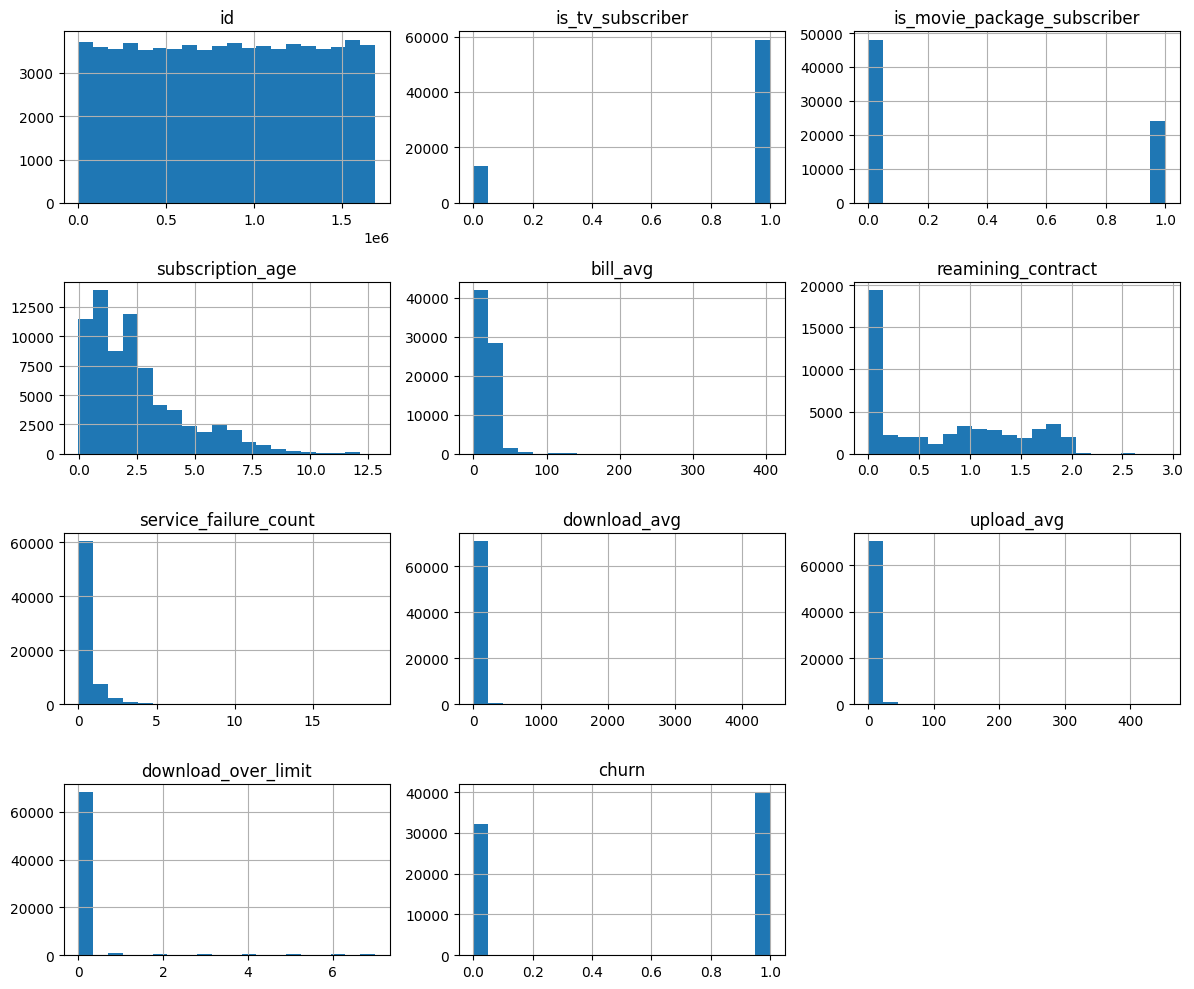

In [ ]:
# Гістограми

df[numeric_cols].hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

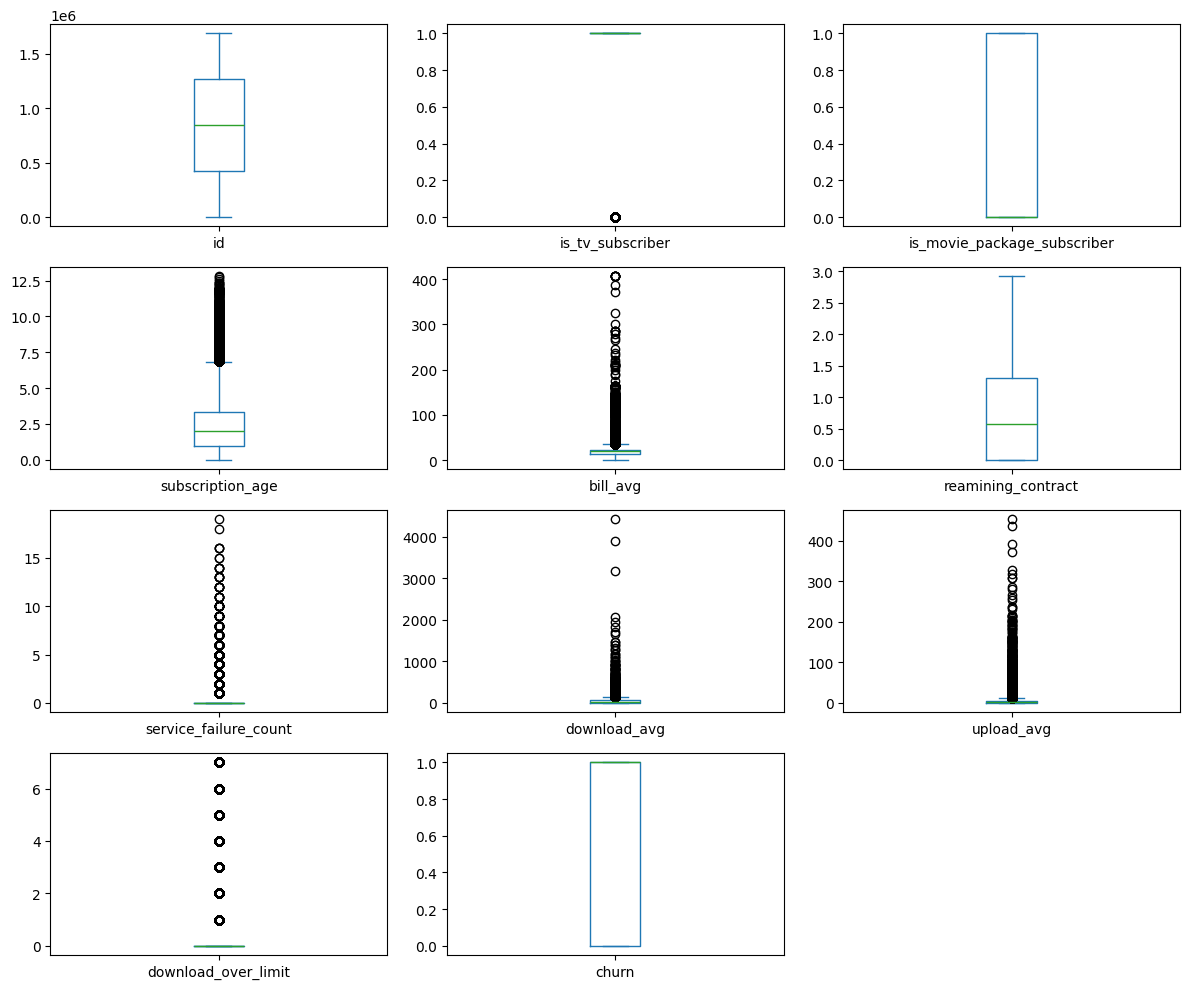

In [ ]:
# Boxplots (для виявлення викидів)

plt.figure(figsize=(12,8))
df[numeric_cols].plot(kind='box', subplots=True, layout=(4,3), figsize=(12,10), sharex=False)
plt.tight_layout()
plt.show()


✔️ Task 1.4 — Аналіз числових ознак

Викиди були виявлені для всіх безперервних числових ознак за допомогою методу IQR:
id: 0
is_tv_subscriber: (не підлягає аналізу — бінарний стовпець)
is_movie_package_subscriber: (не підлягає аналізу — бінарний стовпець)
subscription_age: 3175
bill_avg: 3363
reamining_contract: 0
service_failure_count: (не підлягає аналізу — дискретні малі значення)
download_avg: 3473
upload_avg: 4864
download_over_limit: 3901
churn: 0

In [ ]:
# Task 1.5 — Виявлення пропусків та викидів

# Бінарні колонки
binary_cols = ["is_tv_subscriber",
               "is_movie_package_subscriber",
               "download_over_limit",
               "churn"]

# Всі числові колонки
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Колонки для пошуку викидів = числові мінус бінарні
cols_for_outliers = [col for col in numeric_cols if col not in binary_cols]

print("Колонки для пошуку викидів:")
print(cols_for_outliers)


Колонки для пошуку викидів:
['id', 'subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg']


In [ ]:
# Пошук викидів через IQR
for col in cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()

    print(f"{col}: {outliers} викидів")


id: 0 викидів
subscription_age: 3175 викидів
bill_avg: 3363 викидів
reamining_contract: 0 викидів
service_failure_count: 11867 викидів
download_avg: 3473 викидів
upload_avg: 4864 викидів


✔️ Task 1.5 — Виявлення пропусків та викидів 🔹 Пропуски (Missing values)

Було підраховано кількість пропусків у кожній колонці:
id - 0
is_tv_subscriber - 0
is_movie_package_subscriber - 0
subscription_age - 0
bill_avg - 0
reamining_contract - 21572
service_failure_count - 0
download_avg - 381
upload_avg - 381
download_over_limit - 0
churn - 0


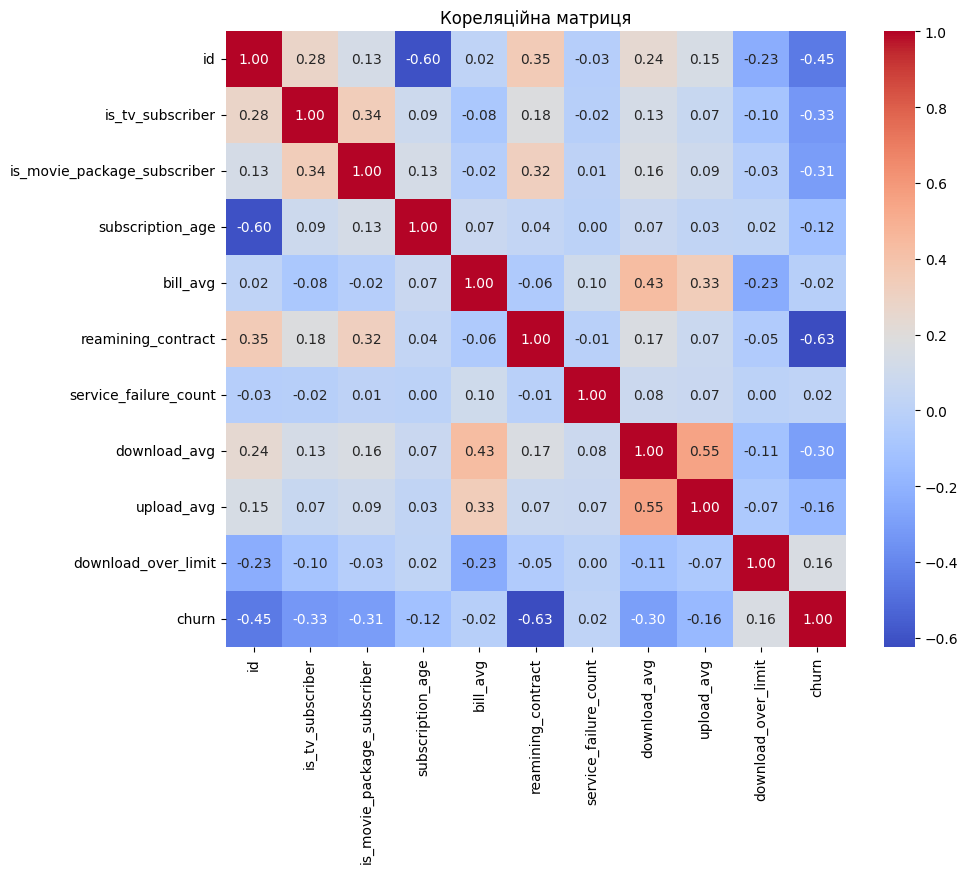

In [ ]:
# Task 1.6 — Матриця кореляцій

plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()


✔️ Task 1.6 — Матриця кореляцій

Було побудовано кореляційну матрицю між числовими ознаками.
Сильно корельованих (>|0.9|) ознак не виявлено.
Попередня обробка даних
Заповнення пропусків - медіана
Масштабування числових ознак - StandardScaler
Обробка викидів - Обрізання за межами IQR
